# Initial setup

In [ ]:
import numpy as np
import pandas as pd
from collections import Counter
!pip install ucimlrepo
!pip install --upgrade certifi
!pip install seaborn
!pip install memory-profiler
import time
import seaborn as sns
import matplotlib.pyplot as plt
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
from ucimlrepo import fetch_ucirepo

import seaborn as sns
from sklearn import metrics
import pandas as pd
import numpy as np
import math
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
from sklearn.metrics import accuracy_score


import tensorflow as tf
from tensorflow import keras
from keras import layers, datasets, models
import numpy as np
import pandas as pd
from sklearn import model_selection, metrics


from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
# start_time = time.time()

# Loading the Dataset

In [ ]:
print('Dataset numbers are:')
print('0:(Validating)    1:(Adult)    2:(Abalone)    3:(Auto MPG)    4:(Breast Cancer)    5:(Breast Cancer Wisconsin (Original))    6:(Credit Approval)')
print('7:(Iris)    8:(Letter Recognition)    9:(Lung Cancer)    10:(Optical Recognition of Handwritten Digits)    11:(Spambase)    12:(Zoo)')
print('13:(Statlog (German Credit Data))    14:(Bank Marketing)    15:(Diabetes 130-US hospitals for years 1999-2008 Dataset)    16:(Glioma Grading Clinical and Mutation Features)    17:(Sepsis Survival Minimal Clinical Records) \n')
while True:
    try:
        user_input = int(input("Please enter a number between 0 and 17 to select your dataset: "))
        if 0 <= user_input <= 17:
            break  # Exit the loop if the input is valid
        else:
            print("Invalid input. Please enter a number between 0 and 17.")
    except ValueError:
        print("Invalid input. Please enter a valid integer.")

Dataset numbers are:
0:(Validating)    1:(Adult)    2:(Abalone)    3:(Auto MPG)    4:(Breast Cancer)    5:(Breast Cancer Wisconsin (Original))    6:(Credit Approval)
7:(Iris)    8:(Letter Recognition)    9:(Lung Cancer)    10:(Optical Recognition of Handwritten Digits)    11:(Spambase)    12:(Zoo)
13:(Statlog (German Credit Data))    14:(Bank Marketing)    15:(Diabetes 130-US hospitals for years 1999-2008 Dataset)    16:(Glioma Grading Clinical and Mutation Features)    17:(Sepsis Survival Minimal Clinical Records) 

Please enter a number between 0 and 17 to select your dataset: 2


# Data Preprocessing

# 0- Validating Dataset

In [ ]:
if(user_input==0):
  # Validating Dataset
  Validating_data = {
    'age': ['youth', 'youth', 'middle_aged', 'senior', 'senior', 'senior', 'middle_aged', 'youth', 'youth', 'senior', 'youth', 'middle_aged', 'middle_aged', 'senior'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'medium', 'high', 'medium'],
    'student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'excellent'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
  }

  df = pd.DataFrame(Validating_data)

# 1- Adult Dataset (Accuracy: 82.15 - 81.10 - 83.03)





In [ ]:
if(user_input==1):
  # Adult Dataset
  Dataset = fetch_ucirepo(id=2)
  X = Dataset.data.features
  y = Dataset.data.targets

  df = X
  column_names = df.columns.tolist()

  mask = df.applymap(lambda x: x != "NaN").all(axis=1)
  df = df[mask]

  df.replace("NaNN", pd.NA, inplace=True)
  df = df.apply(lambda col: col.fillna(col.mode()[0]))

  # age
  column = df['age']
  num_bins = 3
  bins = pd.qcut(column, q=num_bins, labels=False, duplicates='drop')
  df['age'] = bins

  # fnlwgt
  column = df['fnlwgt']
  num_bins = 5
  bins = pd.qcut(column, q=num_bins, labels=False, duplicates='drop')
  df['fnlwgt'] = bins

  # education-num
  column = df['education-num']
  num_bins = 3
  bins = pd.qcut(column, q=num_bins, labels=False, duplicates='drop')
  df['education-num'] = bins

  # capital-gain
  column = df['capital-gain']
  num_bins = 10
  bins = pd.qcut(column, q=num_bins, labels=False, duplicates='drop')
  df['capital-gain'] = bins

  # capital-loss
  column = df['capital-loss']
  num_bins = 3
  bins = pd.qcut(column, q=num_bins, labels=False, duplicates='drop')
  df['capital-loss'] = bins

  # hours-per-week
  column = df['hours-per-week']
  num_bins = 4
  bins = pd.qcut(column, q=num_bins, labels=False, duplicates='drop')
  df['hours-per-week'] = bins

# 2- Abalone Dataset (Accuracy: 86.19 - 86.11 - 86.27)

In [ ]:
if(user_input==2):
  # Abalone Dataset
  Dataset = fetch_ucirepo(id=1)
  X = Dataset.data.features
  y = Dataset.data.targets

  df = X
  column_names = df.columns.tolist()

  mask = df.applymap(lambda x: x != "NaN").all(axis=1)
  df = df[mask]

  df.replace("NaNN", pd.NA, inplace=True)
  df = df.apply(lambda col: col.fillna(col.mode()[0]))

  # Length
  column = df['Length']
  num_bins = 3
  bins = pd.qcut(column, q=num_bins, labels=False, duplicates='drop')
  df['Length'] = bins

  # Diameter
  column = df['Diameter']
  num_bins = 3
  bins = pd.qcut(column, q=num_bins, labels=False, duplicates='drop')
  df['Diameter'] = bins

  # Height
  column = df['Height']
  num_bins = 3
  bins = pd.qcut(column, q=num_bins, labels=False, duplicates='drop')
  df['Height'] = bins

  # Whole_weight
  column = df['Whole_weight']
  num_bins = 3
  bins = pd.qcut(column, q=num_bins, labels=False, duplicates='drop')
  df['Whole_weight'] = bins

  # Shucked_weight
  column = df['Shucked_weight']
  num_bins = 3
  bins = pd.qcut(column, q=num_bins, labels=False, duplicates='drop')
  df['Shucked_weight'] = bins

  # Viscera_weight
  column = df['Viscera_weight']
  num_bins = 3
  bins = pd.qcut(column, q=num_bins, labels=False, duplicates='drop')
  df['Viscera_weight'] = bins

  # Shell_weight
  column = df['Shell_weight']
  num_bins = 3
  bins = pd.qcut(column, q=num_bins, labels=False, duplicates='drop')
  df['Shell_weight'] = bins

# 3- Auto MPG Dataset (Accuracy: 73.10 - 73.94 - 71.42)

In [ ]:
if(user_input==3):
  # Auto MPG Dataset
  Dataset = fetch_ucirepo(id=9)
  X = Dataset.data.features
  y = Dataset.data.targets

  df = X
  column_names = df.columns.tolist()

  mask = df.applymap(lambda x: x != "NaN").all(axis=1)
  df = df[mask]

  df.replace("NaNN", pd.NA, inplace=True)
  df = df.apply(lambda col: col.fillna(col.mode()[0]))

  # displacement
  column = df['displacement']
  num_bins = 4
  bins = pd.qcut(column, q=num_bins, labels=False, duplicates='drop')
  df['displacement'] = bins

  # horsepower
  column = df['horsepower']
  num_bins = 4
  bins = pd.qcut(column, q=num_bins, labels=False, duplicates='drop')
  df['horsepower'] = bins

  # weight
  column = df['weight']
  num_bins = 4
  bins = pd.qcut(column, q=num_bins, labels=False, duplicates='drop')
  df['weight'] = bins

  # acceleration
  column = df['acceleration']
  num_bins = 2
  bins = pd.qcut(column, q=num_bins, labels=False, duplicates='drop')
  df['acceleration'] = bins

  # model_year
  column = df['model_year']
  num_bins = 3
  bins = pd.qcut(column, q=num_bins, labels=False, duplicates='drop')
  df['model_year'] = bins

# 4- Breast Cancer Dataset (Accuracy: 70.93 - 61.62 - 67.44)

In [ ]:
if(user_input==4):
  # Breast Cancer Dataset
  Dataset = fetch_ucirepo(id=14)
  X = Dataset.data.features
  y = Dataset.data.targets

  df = X
  column_names = df.columns.tolist()

  mask = df.applymap(lambda x: x != "NaN").all(axis=1)
  df = df[mask]

  df.replace("NaNN", pd.NA, inplace=True)
  df = df.apply(lambda col: col.fillna(col.mode()[0]))

# 5- Breast Cancer Wisconsin (Original) Dataset (Accuracy: 80.95 - 83.80 - 82.38)

In [ ]:
if(user_input==5):
  # Breast Cancer Wisconsin (Original) Dataset
  Dataset = fetch_ucirepo(id=15)
  X = Dataset.data.features
  y = Dataset.data.targets

  df = X
  column_names = df.columns.tolist()

  mask = df.applymap(lambda x: x != "NaN").all(axis=1)
  df = df[mask]

  df.replace("NaNN", pd.NA, inplace=True)
  df = df.apply(lambda col: col.fillna(col.mode()[0]))

  # Clump_thickness
  column = df['Clump_thickness']
  num_bins = 3
  bins = pd.qcut(column, q=num_bins, labels=False, duplicates='drop')
  df['Clump_thickness'] = bins

  # Uniformity_of_cell_size
  column = df['Uniformity_of_cell_size']
  num_bins = 3
  bins = pd.qcut(column, q=num_bins, labels=False, duplicates='drop')
  df['Uniformity_of_cell_size'] = bins

  # Uniformity_of_cell_shape
  column = df['Uniformity_of_cell_shape']
  num_bins = 3
  bins = pd.qcut(column, q=num_bins, labels=False, duplicates='drop')
  df['Uniformity_of_cell_shape'] = bins

  # Marginal_adhesion
  column = df['Marginal_adhesion']
  num_bins = 3
  bins = pd.qcut(column, q=num_bins, labels=False, duplicates='drop')
  df['Marginal_adhesion'] = bins

  # Single_epithelial_cell_size
  column = df['Single_epithelial_cell_size']
  num_bins = 3
  bins = pd.qcut(column, q=num_bins, labels=False, duplicates='drop')
  df['Single_epithelial_cell_size'] = bins

  # Bare_nuclei
  column = df['Bare_nuclei']
  num_bins = 3
  bins = pd.qcut(column, q=num_bins, labels=False, duplicates='drop')
  df['Bare_nuclei'] = bins

  # Bland_chromatin
  column = df['Bland_chromatin']
  num_bins = 3
  bins = pd.qcut(column, q=num_bins, labels=False, duplicates='drop')
  df['Bland_chromatin'] = bins

  # Normal_nucleoli
  column = df['Normal_nucleoli']
  num_bins = 3
  bins = pd.qcut(column, q=num_bins, labels=False, duplicates='drop')
  df['Normal_nucleoli'] = bins

# 6- Credit Approval Dataset (Accuracy: 64.25 - 65.21 - 63.28)

In [ ]:
if(user_input==6):
  # Credit Approval Dataset
  Dataset = fetch_ucirepo(id=27)
  X = Dataset.data.features
  y = Dataset.data.targets

  df = X
  column_names = df.columns.tolist()

  mask = df.applymap(lambda x: x != "NaN").all(axis=1)
  df = df[mask]

  df.replace("NaNN", pd.NA, inplace=True)
  df = df.apply(lambda col: col.fillna(col.mode()[0]))

  # A15
  column = df['A15']
  num_bins = 2
  bins = pd.qcut(column, q=num_bins, labels=False, duplicates='drop')
  df['A15'] = bins

  # A14
  column = df['A14']
  num_bins = 2
  bins = pd.qcut(column, q=num_bins, labels=False, duplicates='drop')
  df['A14'] = bins

  # A11
  column = df['A11']
  num_bins = 2
  bins = pd.qcut(column, q=num_bins, labels=False, duplicates='drop')
  df['A11'] = bins

  # A8
  column = df['A8']
  num_bins = 2
  bins = pd.qcut(column, q=num_bins, labels=False, duplicates='drop')
  df['A8'] = bins

  # A8
  column = df['A8']
  num_bins = 2
  bins = pd.qcut(column, q=num_bins, labels=False, duplicates='drop')
  df['A8'] = bins

  # A3
  column = df['A3']
  num_bins = 2
  bins = pd.qcut(column, q=num_bins, labels=False, duplicates='drop')
  df['A3'] = bins

  # A2
  column = df['A2']
  num_bins = 2
  bins = pd.qcut(column, q=num_bins, labels=False, duplicates='drop')
  df['A2'] = bins

# 7- Iris Dataset (Accuracy: 93.33 - 93.33 - 93.33)

In [ ]:
if(user_input==7):
  # Iris Dataset
  Dataset = fetch_ucirepo(id=53)
  X = Dataset.data.features
  y = Dataset.data.targets

  df = X
  column_names = df.columns.tolist()

  mask = df.applymap(lambda x: x != "NaN").all(axis=1)
  df = df[mask]

  df.replace("NaNN", pd.NA, inplace=True)
  df = df.apply(lambda col: col.fillna(col.mode()[0]))

  # sepal length
  column = df['sepal length']
  num_bins = 4
  bins = pd.qcut(column, q=num_bins, labels=False, duplicates='drop')
  df['sepal length'] = bins

  # sepal width
  column = df['sepal width']
  num_bins = 3
  bins = pd.qcut(column, q=num_bins, labels=False, duplicates='drop')
  df['sepal width'] = bins

  # petal length
  column = df['petal length']
  num_bins = 3
  bins = pd.qcut(column, q=num_bins, labels=False, duplicates='drop')
  df['petal length'] = bins

  # petal width
  column = df['petal width']
  num_bins = 3
  bins = pd.qcut(column, q=num_bins, labels=False, duplicates='drop')
  df['petal width'] = bins

# 8- Letter Recognition Dataset (Accuracy: 69.55 - 69.10 - 63.83)

In [ ]:
if(user_input==8):
  # Letter Recognition Dataset
  Dataset = fetch_ucirepo(id=59)
  X = Dataset.data.features
  y = Dataset.data.targets

  df = X
  column_names = df.columns.tolist()

  mask = df.applymap(lambda x: x != "NaN").all(axis=1)
  df = df[mask]

  df.replace("NaNN", pd.NA, inplace=True)
  df = df.apply(lambda col: col.fillna(col.mode()[0]))

  # x-box
  column = df['x-box']
  num_bins = 7
  bins = pd.qcut(column, q=num_bins, labels=False, duplicates='drop')
  df['x-box'] = bins

  # y-box
  column = df['y-box']
  bins = pd.qcut(column, q=num_bins, labels=False, duplicates='drop')
  df['y-box'] = bins

  # width
  column = df['width']
  bins = pd.qcut(column, q=num_bins, labels=False, duplicates='drop')
  df['width'] = bins

  # high
  column = df['high']
  bins = pd.qcut(column, q=num_bins, labels=False, duplicates='drop')
  df['high'] = bins

  # onpix
  column = df['onpix']
  bins = pd.qcut(column, q=num_bins, labels=False, duplicates='drop')
  df['onpix'] = bins

  # x-bar
  column = df['x-bar']
  bins = pd.qcut(column, q=num_bins, labels=False, duplicates='drop')
  df['x-bar'] = bins

  # y-bar
  column = df['y-bar']
  bins = pd.qcut(column, q=num_bins, labels=False, duplicates='drop')
  df['y-bar'] = bins

  # x2bar
  column = df['x2bar']
  bins = pd.qcut(column, q=num_bins, labels=False, duplicates='drop')
  df['x2bar'] = bins

  # y2bar
  column = df['y2bar']
  bins = pd.qcut(column, q=num_bins, labels=False, duplicates='drop')
  df['y2bar'] = bins

  # xybar
  column = df['xybar']
  bins = pd.qcut(column, q=num_bins, labels=False, duplicates='drop')
  df['xybar'] = bins

  # x2ybr
  column = df['x2ybr']
  bins = pd.qcut(column, q=num_bins, labels=False, duplicates='drop')
  df['x2ybr'] = bins

  # xy2br
  column = df['xy2br']
  bins = pd.qcut(column, q=num_bins, labels=False, duplicates='drop')
  df['xy2br'] = bins

  # x-ege
  column = df['x-ege']
  bins = pd.qcut(column, q=num_bins, labels=False, duplicates='drop')
  df['x-ege'] = bins

  # xegvy
  column = df['xegvy']
  bins = pd.qcut(column, q=num_bins, labels=False, duplicates='drop')
  df['xegvy'] = bins

  # y-ege
  column = df['y-ege']
  bins = pd.qcut(column, q=num_bins, labels=False, duplicates='drop')
  df['y-ege'] = bins

  # yegvx
  column = df['yegvx']
  num_bins = 4
  bins = pd.qcut(column, q=num_bins, labels=False, duplicates='drop')
  df['yegvx'] = bins

# 9- Lung Cancer Dataset (Accuracy: 80 - 50 - 50)

In [ ]:
if(user_input==9):
  # Lung Cancer Dataset
  Dataset = fetch_ucirepo(id=62)
  X = Dataset.data.features
  y = Dataset.data.targets

  df = X
  column_names = df.columns.tolist()

  mask = df.applymap(lambda x: x != "NaN").all(axis=1)
  df = df[mask]

  df.replace("NaNN", pd.NA, inplace=True)
  df = df.apply(lambda col: col.fillna(col.mode()[0]))

# 10- Optical Recognition of Handwritten Digits Dataset (Accuracy: 91.75 - 92.17 - 90.86)

In [ ]:
if(user_input==10):
  # Optical Recognition of Handwritten Digits Dataset
  Dataset = fetch_ucirepo(id=80)
  X = Dataset.data.features
  y = Dataset.data.targets

  df = X
  column_names = df.columns.tolist()

  mask = df.applymap(lambda x: x != "NaN").all(axis=1)
  df = df[mask]

  df.replace("NaNN", pd.NA, inplace=True)
  df = df.apply(lambda col: col.fillna(col.mode()[0]))

# 11- Spambase Dataset (Accuracy: 80.91 - 80.91 - 80.91)

In [ ]:
if(user_input==11):
  # Spambase Dataset
  Dataset = fetch_ucirepo(id=105)
  X = Dataset.data.features
  y = Dataset.data.targets

  df = X
  column_names = df.columns.tolist()

  mask = df.applymap(lambda x: x != "NaN").all(axis=1)
  df = df[mask]

  df.replace("NaNN", pd.NA, inplace=True)
  df = df.apply(lambda col: col.fillna(col.mode()[0]))

# 12- Zoo Dataset (Accuracy: 73.33 - 73.33 - 80.00)




In [ ]:
if(user_input==12):
  # Zoo Dataset
  Dataset = fetch_ucirepo(id=111)
  X = Dataset.data.features
  y = Dataset.data.targets

  df = X
  column_names = df.columns.tolist()

  mask = df.applymap(lambda x: x != "NaN").all(axis=1)
  df = df[mask]

  df.replace("NaNN", pd.NA, inplace=True)
  df = df.apply(lambda col: col.fillna(col.mode()[0]))

# 13- Statlog (German Credit Data) Dataset (Accuracy: 90.00 - 90.66 - 91.66)

In [ ]:
if(user_input==13):
  # Statlog (German Credit Data) Dataset
  Dataset = fetch_ucirepo(id=144)
  X = Dataset.data.features
  y = Dataset.data.targets

  df = X
  column_names = df.columns.tolist()

  mask = df.applymap(lambda x: x != "NaN").all(axis=1)
  df = df[mask]

  df.replace("NaNN", pd.NA, inplace=True)
  df = df.apply(lambda col: col.fillna(col.mode()[0]))

  # Attribute2
  column = df['Attribute2']
  num_bins = 5
  bins = pd.qcut(column, q=num_bins, labels=False, duplicates='drop')
  df['Attribute2'] = bins

  # Attribute5
  column = df['Attribute5']
  bins = pd.qcut(column, q=num_bins, labels=False, duplicates='drop')
  df['Attribute5'] = bins

  # Attribute13
  column = df['Attribute13']
  bins = pd.qcut(column, q=num_bins, labels=False, duplicates='drop')
  df['Attribute13'] = bins

# 14- Bank Marketing Dataset (Accuracy: 84.65 - 83.50 - 85.00)

In [ ]:
if(user_input==14):
  # Bank Marketing Dataset
  Dataset = fetch_ucirepo(id=222)
  X = Dataset.data.features
  y = Dataset.data.targets

  df = X
  column_names = df.columns.tolist()

  mask = df.applymap(lambda x: x != "NaN").all(axis=1)
  df = df[mask]

  df.replace("NaNN", pd.NA, inplace=True)
  df = df.apply(lambda col: col.fillna(col.mode()[0]))

  # age
  column = df['age']
  num_bins = 4
  bins = pd.qcut(column, q=num_bins, labels=False, duplicates='drop')
  df['age'] = bins

  # balance
  column = df['balance']
  num_bins = 4
  bins = pd.qcut(column, q=num_bins, labels=False, duplicates='drop')
  df['balance'] = bins

  # day_of_week
  column = df['day_of_week']
  num_bins = 3
  bins = pd.qcut(column, q=num_bins, labels=False, duplicates='drop')
  df['day_of_week'] = bins

  # duration
  column = df['duration']
  num_bins = 3
  bins = pd.qcut(column, q=num_bins, labels=False, duplicates='drop')
  df['duration'] = bins

  # campaign
  column = df['campaign']
  num_bins = 3
  bins = pd.qcut(column, q=num_bins, labels=False, duplicates='drop')
  df['campaign'] = bins

  # pdays
  column = df['pdays']
  num_bins = 4
  bins = pd.qcut(column, q=num_bins, labels=False, duplicates='drop')
  df['pdays'] = bins

  # previous
  column = df['previous']
  num_bins = 3
  bins = pd.qcut(column, q=num_bins, labels=False, duplicates='drop')
  df['previous'] = bins

# 15- Diabetes 130-US hospitals for years 1999-2008 Dataset (Accuracy: 100 - 100 - 100)

In [ ]:
if(user_input==15):
  # Diabetes 130-US hospitals for years 1999-2008 Dataset
  Dataset = fetch_ucirepo(id=296)
  X = Dataset.data.features
  y = Dataset.data.targets

  df = X
  column_names = df.columns.tolist()

  mask = df.applymap(lambda x: x != "NaN").all(axis=1)
  df = df[mask]

  df.replace("NaNN", pd.NA, inplace=True)
  df = df.apply(lambda col: col.fillna(col.mode()[0]))

# 16- Glioma Grading Clinical and Mutation Features Dataset (Accuracy: 92.4 - 94.04 - 91.26)

In [ ]:
if(user_input==16):
  # Glioma Grading Clinical and Mutation Features Dataset
  Dataset = fetch_ucirepo(id=759)
  X = Dataset.data.features
  y = Dataset.data.targets

  df = X
  column_names = df.columns.tolist()

  mask = df.applymap(lambda x: x != "NaN").all(axis=1)
  df = df[mask]

  df.replace("NaNN", pd.NA, inplace=True)
  df = df.apply(lambda col: col.fillna(col.mode()[0]))

  # Age_at_diagnosis
  column = df['Age_at_diagnosis']
  num_bins = 4
  bins = pd.qcut(column, q=num_bins, labels=False, duplicates='drop')
  df['Age_at_diagnosis'] = bins

# 17- Sepsis Survival Minimal Clinical Records Dataset (Accuracy: 76.63 - 76.63 - 76.63)

In [ ]:
if(user_input==17):
  # Sepsis Survival Minimal Clinical Records Dataset
  Dataset = fetch_ucirepo(id=827)
  X = Dataset.data.features
  y = Dataset.data.targets

  df = X
  column_names = df.columns.tolist()

  mask = df.applymap(lambda x: x != "NaN").all(axis=1)
  df = df[mask]

  df.replace("NaNN", pd.NA, inplace=True)
  df = df.apply(lambda col: col.fillna(col.mode()[0]))

  # age_years
  column = df['age_years']
  num_bins = 10
  bins = pd.qcut(column, q=num_bins, labels=False, duplicates='drop')
  df['age_years'] = bins

# Mapping Values

In [ ]:
for column in df.columns:
    # Extract unique values
    unique_values = df[column].unique()
    # Create a mapping dictionary
    mapping_dict = {value: index for index, value in enumerate(unique_values)}
    # Replace values in the DataFrame
    df[column] = df[column].replace(mapping_dict)

# Implementation

In [ ]:
def entropy(data):
    labels = np.unique(data[:,-1])
    impurity = 0
    for label in labels:
        prob = len(data[data[:,-1]==label])/len(data)
        impurity -= prob*np.log2(prob)
    return impurity

def informationGain(df, attribute):
    gain = entropy(df.to_numpy())
    values = df[attribute].values
    for value in np.unique(values):
        new_df = df[df[attribute]==value]
        impurity = entropy(new_df.to_numpy())
        weight = len(new_df)/len(df)
        gain -= weight*impurity
    return gain

def GainRatio(df, attribute):
    gain = entropy(df.to_numpy())
    values = df[attribute].values
    split_info = 0
    Gain_Ratio = 0
    for value in np.unique(values):
        new_df = df[df[attribute]==value]
        impurity = entropy(new_df.to_numpy())
        weight = len(new_df)/len(df)
        gain -= weight*impurity
        split_info -= (len(new_df)/len(df)) * np.log2(len(new_df)/len(df))
    # Check if split_info is zero before calculating Gain Ratio
    if split_info != 0:
        Gain_Ratio = gain/split_info
    else:
        Gain_Ratio = 0
    return Gain_Ratio

def gini(data):
    labels = np.unique(data[:, -1])
    impurity = 1
    for label in labels:
        prob = len(data[data[:, -1] == label]) / len(data)
        impurity -= prob ** 2
    return impurity

def giniIndex(df, attribute):
    index = gini(df.to_numpy())
    values = df[attribute].values
    if len(np.unique(values)) > 2:
        # For features with more than 2 outcomes, find the best 2 outcomes based on Gini Index
        best_outcomes = find_best_outcomes(df, attribute)
        new_df = df[df[attribute].isin(best_outcomes)]
        index = gini(new_df.to_numpy())
    else:
        for value in np.unique(values):
            new_df = df[df[attribute] == value]
            impurity = gini(new_df.to_numpy())
            weight = len(new_df) / len(df)
            index -= weight * impurity
    return index

def find_best_outcomes(df, attribute):
    outcomes = np.unique(df[attribute].values)
    best_gini = 0
    best_outcomes = (outcomes[0], outcomes[1])

    for i in range(len(outcomes) - 1):
        for j in range(i + 1, len(outcomes)):
            temp_outcomes = (outcomes[i], outcomes[j])
            new_df = df[df[attribute].isin(temp_outcomes)]
            impurity = gini(new_df.to_numpy())
            if impurity > best_gini:
                best_gini = impurity
                best_outcomes = temp_outcomes

    return best_outcomes

def plot_confusion_matrix(confusion_matrix, labels):
    plt.figure(figsize=(len(labels), len(labels)))
    sns.heatmap(confusion_matrix, annot=True, fmt='.0f', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Confusion Matrix Heatmap')
    plt.show()

def majorityVote(dataset):
    return Counter(dataset).most_common(1)[0][0]

In [ ]:
class Tree:

    def __init__(self, value=''):
        self.attribute = None
        # Every tree has some sub trees called branches
        self.branches = []
        # For sub trees we have value of the tree attribute
        self.value = value
        # If the tree is leaf, leaf_value will contains its value
        self.leaf_value = ''

    def addBranch(self, branch):
        self.branches.append(branch)

    def predict(self, data):
        if self.leaf_value != '':
            return self.leaf_value

        data_value = data[self.attribute].values[0]
        for branch in self.branches:
            if branch.value == data_value:
                return branch.predict(data)

    def predictDf(self, df, test):
        labels = np.unique(df.values[:,-1])
        n = len(labels)
        confusion = np.zeros((n,n))
        accuracy = 0
        attributes = df.columns

        for row in test.values:
            vote = self.predict(testData(attributes, [row]))

            #sim_idx = np.argwhere(labels == vote)[0][0]
            idx_array = np.argwhere(labels == vote)
            if idx_array.size > 0:
              sim_idx = idx_array[0][0]
            else:
              sim_idx = -1

            act_i = np.argwhere(labels == row[-1])[0][0]
            confusion[sim_idx][act_i] += 1

        accuracy = sum([confusion[i][i] for i in range(n)]) / len(test)
        return confusion, accuracy

    def toStr(self, index=0) -> str:
        if self.leaf_value != '':
            return self.leaf_value
        outStr = self.attribute + '\n'
        for branch in self.branches:
            for _ in range(index): outStr += ' '
            subtree = str(branch.toStr(index+4))
            outStr += '--> ' + str(branch.value) + ': ' + subtree
            if subtree[-1] != '\n':
                outStr += '\n'
        return outStr

In [ ]:
# Information Gain
def decisionTree_InformationGain(tree, df, depth):
    node_impurity = entropy(df.to_numpy())
    if node_impurity == 0:
        # All data have the same label
        tree.leaf_value = df.values[0,-1]
        return tree
    if len(df.columns[:-1]) == 0:
        # Find most common label
        tree.leaf_value = majorityVote(df.values[:,-1])
        return tree
    if depth == 0:
        # Find most common label
        tree.leaf_value = majorityVote(df.values[:,-1])
        return tree

    # Finding the best attribute
    best_attribute = df.columns[0]
    best_gain = 0
    for attribute in df.columns[:-1]:
        gain = informationGain(df, attribute)
        if gain > best_gain:
            best_gain = gain
            best_attribute = attribute
    tree.attribute = best_attribute
    values = df[best_attribute].values

    # For each value we have a distinct branch
    for value in np.unique(values):
        new_df = df[df[best_attribute]==value]
        new_df.pop(best_attribute)
        tree.addBranch(decisionTree_InformationGain(Tree(value), new_df, depth-1))
    return tree

# Gain Ratio
def decisionTree_GainRatio(tree, df, depth):
    node_impurity = entropy(df.to_numpy())
    if node_impurity == 0:
        # All data have the same label
        tree.leaf_value = df.values[0,-1]
        return tree
    if len(df.columns[:-1]) == 0:
        # Find most common label
        tree.leaf_value = majorityVote(df.values[:,-1])
        return tree
    if depth == 0:
        # Find most common label
        tree.leaf_value = majorityVote(df.values[:,-1])
        return tree

    # Finding the best attribute
    best_attribute = df.columns[0]
    best_gain = 0
    for attribute in df.columns[:-1]:
        gain = GainRatio(df, attribute)
        if gain > best_gain:
            best_gain = gain
            best_attribute = attribute
    tree.attribute = best_attribute
    values = df[best_attribute].values

    # For each value we have a distinct branch
    for value in np.unique(values):
        new_df = df[df[best_attribute]==value]
        new_df.pop(best_attribute)
        tree.addBranch(decisionTree_GainRatio(Tree(value), new_df, depth-1))
    return tree

# Gini Index
def decisionTree_GiniIndex(tree, df, depth):
    node_impurity = gini(df.to_numpy())
    if node_impurity == 0:
        # All data have the same label
        tree.leaf_value = df.values[0, -1]
        return tree
    if len(df.columns[:-1]) == 0:
        # Find the most common label
        tree.leaf_value = majorityVote(df.values[:, -1])
        return tree
    if depth == 0:
        # Find the most common label
        tree.leaf_value = majorityVote(df.values[:, -1])
        return tree

    # Finding the best attribute
    best_attribute = df.columns[0]
    best_index = 0
    for attribute in df.columns[:-1]:
        index = giniIndex(df, attribute)
        if index > best_index:
            best_index = index
            best_attribute = attribute
    tree.attribute = best_attribute
    values = df[best_attribute].values

    # For each value, we have a distinct branch
    for value in np.unique(values):
        new_df = df[df[best_attribute] == value]
        new_df.pop(best_attribute)
        tree.addBranch(decisionTree_GiniIndex(Tree(value), new_df, depth - 1))
    return tree

def testData(attributes, values):
    data = pd.DataFrame(values, columns=attributes)
    return data

# Training

In [ ]:
train = df.sample(frac=0.7, random_state=0)
test = df.drop(train.index)
D = df.shape[1]

Information Gain:
Confusion Matrix: 
[[392.  36.   1.]
 [ 32. 317.  49.]
 [  3.  52. 371.]]
Accuracy: 86.19313647246608%


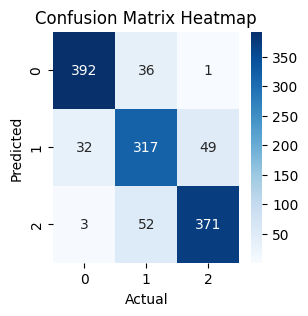

Gain Ratio:
Confusion Matrix: 
[[393.  36.   1.]
 [ 30. 315.  49.]
 [  4.  54. 371.]]
Accuracy: 86.11332801276936%


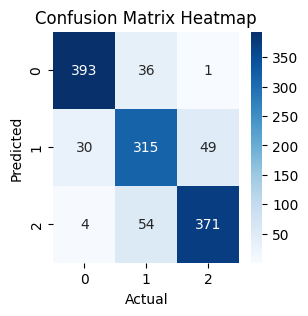

Gini Index:
Confusion Matrix: 
[[394.  33.   1.]
 [ 31. 317.  50.]
 [  2.  55. 370.]]
Accuracy: 86.27294493216282%


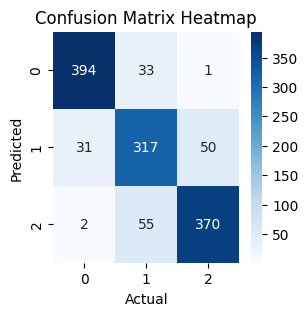

In [ ]:
# %load_ext memory_profiler

# Information Gain
tree_InformationGain = decisionTree_InformationGain(Tree(), train, depth=D-1)
confusion, accuracy = tree_InformationGain.predictDf(df, test)
print('Information Gain:')
print('Confusion Matrix: \n{}'.format(confusion))
print('Accuracy: {}%'.format(accuracy*100))
plot_confusion_matrix(confusion, np.unique(df.values[:,-1]))

# Gain Ratio
tree_GainRatio = decisionTree_GainRatio(Tree(), train, depth=D-1)
confusion, accuracy = tree_GainRatio.predictDf(df, test)
print('Gain Ratio:')
print('Confusion Matrix: \n{}'.format(confusion))
print('Accuracy: {}%'.format(accuracy*100))
plot_confusion_matrix(confusion, np.unique(df.values[:,-1]))

# Gini Index
tree_GiniIndex = decisionTree_GiniIndex(Tree(), train, depth=D-1)
confusion, accuracy = tree_GiniIndex.predictDf(df, test)
print('Gini Index:')
print('Confusion Matrix: \n{}'.format(confusion))
print('Accuracy: {}%'.format(accuracy*100))
plot_confusion_matrix(confusion, np.unique(df.values[:,-1]))

# %memit -r 1
# end_time = time.time()
# execution_time = end_time - start_time
# print(f"Execution time: {execution_time} seconds")

In [ ]:
print('Final tree for Information Gain: \n')
print(tree_InformationGain.toStr())
print('---------------- \n')
print('Final tree for Gain Ratio: \n')
print(tree_GainRatio.toStr())
print('---------------- \n')
print('Final tree for Gini Index: \n')
print(tree_GiniIndex.toStr())

Final tree for Information Gain: 

Whole_weight
--> 0: Height
    --> 0: Length
        --> 0: Diameter
            --> 0: Viscera_weight
                --> 0: Sex
                    --> 0: Shucked_weight
                        --> 0: 0
                        --> 1: 0
                    --> 1: Shucked_weight
                        --> 0: 0
                        --> 1: 0
                    --> 2: Shucked_weight
                        --> 0: 0
                        --> 1: 0
                        --> 2: 0
                --> 1: Sex
                    --> 0: Shucked_weight
                        --> 0: 0
                        --> 1: 0
                    --> 1: 0
                    --> 2: Shucked_weight
                        --> 0: 0
                        --> 1: 0
            --> 1: Sex
                --> 0: 0
                --> 1: Shucked_weight
                    --> 0: Viscera_weight
                        --> 0: 1
                --> 2: 0
        --> 1: Visce

# Extra credit

In [ ]:
dirs = ['./DT_Dataset/1_Adult/1Adult.csv',
      './DT_Dataset/2_Abalone/2Abalone.csv',
      './DT_Dataset/3_Auto MPG/3AutoMPG.csv',
      './DT_Dataset/4_Breast Cancer/4BreastCancer.csv',
      './DT_Dataset/5_Breast Cancer Wisconsin (Original)/5BreastCancerWisconsinOriginal.csv',
      './DT_Dataset/6_Credit Approval/6CreditApproval.csv',
      './DT_Dataset/7_Iris/7Iris.csv',
      './DT_Dataset/8_Letter Recognition/8LetterRecognition.csv',
      './DT_Dataset/9_Lung Cancer/9LungCancer.csv',
      './DT_Dataset/10_Optical Recognition of Handwritten Digits/10OpticalRecognitionofHandwrittenDigits.csv',
      './DT_Dataset/11_Spambase/11Spambase.csv',
      './DT_Dataset/12_Zoo/12Zoo.csv',
      './DT_Dataset/13_Statlog (German Credit Data)/13StatlogGermanCreditData.csv',
      './DT_Dataset/14_Bank Marketing/14BankMarketing.csv',
      './DT_Dataset/16_Glioma Grading Clinical and Mutation Features/16GliomaGradingClinicalandMutationFeatures.csv'
]

In [ ]:
time_elapsed = {}
memory_usage = {}
SKlearn_SVM_Accuracy_Scores = []
SKlearn_DT_Accuracy_Scores = []
TF_DL_Accuracy_Scores = []
total_memory_used = []
total_time_taken = []

for dir in dirs:
    print("-----------------------------------------------------------------------------------------------")
    print("Current Directory : ",dir)
    df = pd.read_csv(dir)
    df.describe()

    is_categorical = True
    if len(list(set(df.columns) - set(df._get_numeric_data().columns)))==0:
        is_categorical = False

    if is_categorical:
        df = df.replace('?', np.NaN)
        df.fillna(df.mode().iloc[0], inplace=True)

    print("Is Categorical flag: ",is_categorical)
    cdf=df

    lst = df.values.tolist()
    tick = time.time()#start time
    tracemalloc.start()
    trainDF_x, testDF_x = model_selection.train_test_split(lst)
    trainDF_y =[]
    for l in trainDF_x:
        trainDF_y.append(l[-1])
        del l[-1]

    testDF_y = []
    for lst in testDF_x:
        testDF_y.append(lst[-1])
        del lst[-1]

    accuracy_scores = {}

    if is_categorical==False:
        tracemalloc.start()
        tick = time.time()
        clf4 = tree.DecisionTreeClassifier()
        clf4.fit(np.array(trainDF_x), np.array(trainDF_y))
        inbuiltmodel_pred = clf4.predict(np.array(testDF_x))
        tock = time.time()
        memory_usage['Inbuilt DT Model Memory Usage'] = tracemalloc.get_traced_memory()[0]

        total_memory_used.append( {"memory_usage['Inbuilt Decision Tree Model Memory Usage']" : tracemalloc.get_traced_memory()[0]})

        time_elapsed['Inbuilt DT Model time'] = round((tock - tick) * 1000, 2)
        total_time_taken.append({"time_elapsed['Inbuilt Decision Tree Model time']" : round((tock - tick) * 1000, 2)})

        tracemalloc.stop()
        accuracy_scores['Sklearn Decision Tree Model Accuracy'] = accuracy_score(np.array(testDF_y), inbuiltmodel_pred)

        SKlearn_DT_Accuracy_Scores.append(format(accuracy_score(np.array(testDF_y), inbuiltmodel_pred)))

        print('Accuracy Score of Sklearn Decision tree Model Numerical: {0:0.3f}' .format(accuracy_score(np.array(testDF_y), inbuiltmodel_pred)))

        # """""performing SVM on same dataset"""""
        tracemalloc.start()
        tick = time.time()
        svc = SVC()
        svc.fit(np.array(trainDF_x), np.array(trainDF_y).flatten())
        svm_pred = svc.predict(np.array(testDF_x))
        tock = time.time()
        memory_usage['SVM Model Memory Usage'] = tracemalloc.get_traced_memory()[0]
        total_memory_used.append({"memory_usage['SVM Model Memory Usage']" : tracemalloc.get_traced_memory()[0]})
        tracemalloc.stop()

        time_elapsed['SVM Model time'] = round((tock - tick) * 1000, 2)
        total_time_taken.append({"time_elapsed['SVM Model time']" : round((tock - tick) * 1000, 2)})

        accuracy_scores['SVM Model Accuracy'] = accuracy_score(testDF_y, svm_pred)

        SKlearn_SVM_Accuracy_Scores.append(format(accuracy_score(testDF_y, svm_pred)))

        print('Accuracy Score of Sklearn SVM Model Numerical: {0:0.3f}'.format(accuracy_score(testDF_y, svm_pred)))

        ten_df = df
        tick = time.time()
        tracemalloc.start()
        X = ten_df.iloc[:, :-1].values
        Y = ten_df.iloc[:, -1].values.reshape(-1, 1)
        X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=.3, random_state=41)
        print(len(X_train))
        print(len(Y_train))
        model = tf.keras.Sequential([
                    tf.keras.layers.Dense(128, activation='relu'),
                    tf.keras.layers.Dense(64, activation='relu'),
                    tf.keras.layers.Dense(1, activation='sigmoid')
                ])
        model.compile(optimizer='rmsprop',
                        loss='binary_crossentropy',
                        metrics=['accuracy'])
        model.fit(X_train, Y_train, batch_size=32, epochs=20)
        loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
        print('Test loss:', loss)
        print('Test accuracy:', accuracy)
        tensor_pred = model.predict(X_test)
        tensor_pred = np.argmax(tensor_pred, axis=1)
        y_test = np.argmax(Y_test, axis=1)
        cm = metrics.confusion_matrix(y_test, tensor_pred)

        TF_DL_Accuracy_Scores.append(accuracy)
        print(cm)
        print('Accuracy Score of Tensorflow Classification:: {0:0.3f}'.format( accuracy))
        print(metrics.confusion_matrix(y_test, tensor_pred))
        print(metrics.classification_report(y_test, tensor_pred))
        tock = time.time()
        time_elapsed['TensorFlow Model time'] = round((tock - tick) * 1000, 2)
        memory_usage['Tensorflow model memory usage'] = tracemalloc.get_traced_memory()[0]
        total_memory_used.append({"memory_usage['Tensorflow model memory usage']" : tracemalloc.get_traced_memory()[0]})
        tracemalloc.stop()
        total_time_taken.append({"time_elapsed['TensorFlow Model time']" : round((tock - tick) * 1000, 2)})
        accuracy_scores['Tensorflow Model Accuracy'] = accuracy


-----------------------------------------------------------------------------------------------
Current Directory :  ./DT_Dataset/1_Adult/1Adult.csv


FileNotFoundError: ignored

In [ ]:
print(total_memory_used)
print(total_time_taken)

In [ ]:
print(SKlearn_DT_Accuracy_Scores)
print(SKlearn_SVM_Accuracy_Scores)
print(TF_DL_Accuracy_Scores)